## Importing the dataset from kaggle

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vbookshelf/rice-leaf-diseases")

print("Path to dataset files:", path)

/Users/isnisnwsjmowm/Downloads/DataMites/Projects_Upload/Leaf_Disease_Detection/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 36.7M/36.7M [00:04<00:00, 9.02MB/s]

Extracting files...


Path to dataset files: /Users/isnisnwsjmowm/.cache/kagglehub/datasets/vbookshelf/rice-leaf-diseases/versions/1


### Import Required libraries for the project

In [27]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing import image

### Read the subfolders from directory rice leaf diseases 

In [10]:
import tensorflow as tf

train_df = tf.keras.utils.image_dataset_from_directory(
    directory='../Leaf_Disease_Detection/rice_leaf_diseases',
    labels='inferred',
    label_mode='int',     
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,    
    subset='training',
    seed=123
)

validation_df = tf.keras.utils.image_dataset_from_directory(
    directory='../Leaf_Disease_Detection/rice_leaf_diseases',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset='validation',
    seed=123
)

Found 120 files belonging to 3 classes.
Using 96 files for training.
Found 120 files belonging to 3 classes.
Using 24 files for validation.


In [11]:
# Normalize

def process (image,labels):
    image = tf.cast(image/255, tf.float32)
    return image,labels

train_df = train_df.map(process)
validation_df = validation_df.map(process)

In [14]:
### Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,427 (56.64 MB)

 Trainable params: 14,847,427 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_df, epochs = 10, validation_data = validation_df)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 795ms/step - accuracy: 0.3646 - loss: 3.9810 - val_accuracy: 0.2917 - val_loss: 1.2845
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 755ms/step - accuracy: 0.4167 - loss: 1.1175 - val_accuracy: 0.2917 - val_loss: 1.1912
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 776ms/step - accuracy: 0.4479 - loss: 1.0780 - val_accuracy: 0.2500 - val_loss: 1.1530
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 823ms/step - accuracy: 0.4792 - loss: 1.0163 - val_accuracy: 0.5000 - val_loss: 1.0557
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 712ms/step - accuracy: 0.5104 - loss: 0.9664 - val_accuracy: 0.2917 - val_loss: 1.2765
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 771ms/step - accuracy: 0.5104 - loss: 0.9852 - val_accuracy: 0.3333 - val_loss: 1.0330
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 811ms/step - accuracy: 0.6979 - loss: 0.8624 - val_accuracy: 0.6250 - val_loss: 0.8899
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step - accuracy: 0.7292 - loss: 0.8115 - val_accuracy: 0.4167 - val_loss:

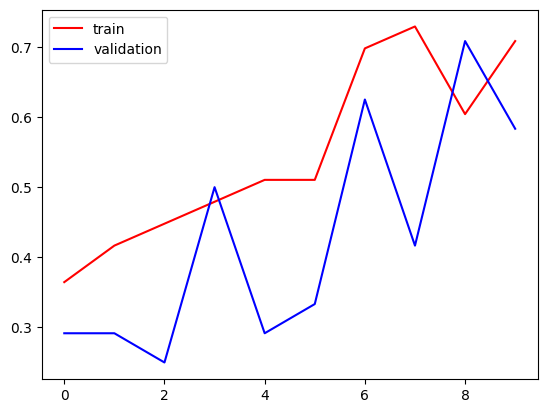

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

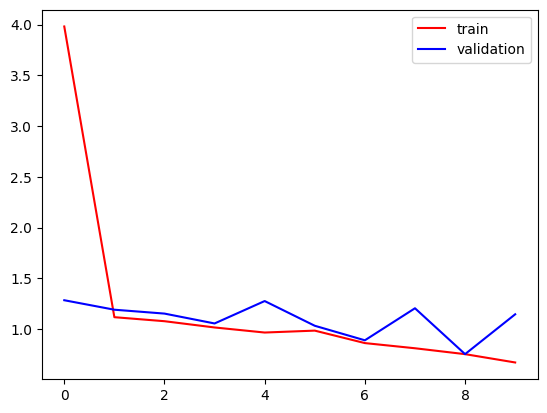

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: leaf smut


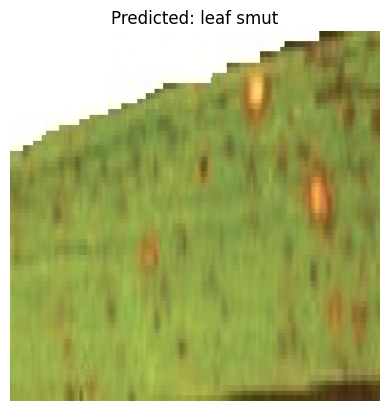

In [41]:
img = image.load_img('DSC_0502.jpg', target_size=(256, 256))  # same size as training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize

# Make prediction
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]

# Class labels (in the same order as subfolders during training)
class_names = ['bacterial leaf blight', 'brown spot', 'leaf smut']
print("Predicted class:", class_names[predicted_class])

import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis("off")
plt.show()